## Very simple toturial to implicit geometry

## A Sphere example
How to represent boundaries. Implicit function give us that a shape can represent as its zero level set, i.e $\mathcal{S} = \{x:\phi(x) = 0\}$, the set of which value is zero. Here is an exmple of a sphere.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sphere_sdf_fn(coord):
    ## x: coordinates (1x3)
    return np.linalg.norm(coord, ord=2, axis=-1) - 1

In [2]:
num_samples = 100
x = np.linspace(-2,2,num_samples)
y = np.linspace(-2,2,num_samples)
z = np.linspace(-2,2,num_samples)
xs,ys,zs = np.meshgrid(x,y,z)
coords = np.stack([xs,ys,zs], axis=-1) # discretization of the real field

In [3]:
sdf = sphere_sdf_fn(coords)

## visulize the sdf of a sphere (plot the level set)

<a list of 8 text.Text objects>

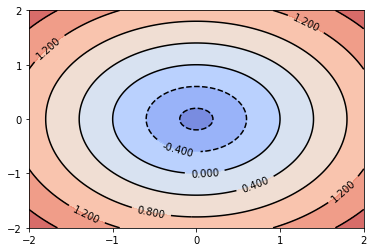

In [4]:

X, Y = np.meshgrid(x, y)
plt.xticks(np.linspace(-2, 2, 5))
plt.yticks(np.linspace(-2, 2, 5))
plt.contourf(X, Y, sdf[:, num_samples//2, :], alpha=0.75, cmap=plt.cm.coolwarm)
C = plt.contour(X, Y, sdf[:, num_samples//2, :], 8, colors='black')
plt.clabel(C)


## Marching Cubes the sphere

In [36]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
spacing = (x[1]-x[0], y[1]-y[0], z[1]-z[0])
verts, faces, normals, values = measure.marching_cubes_lewiner(sdf, 0, step_size=2, spacing=spacing)
# transform to is original coordinate systems
verts += np.array([[x[0], y[0], z[0]]])


visualize the discrete results.

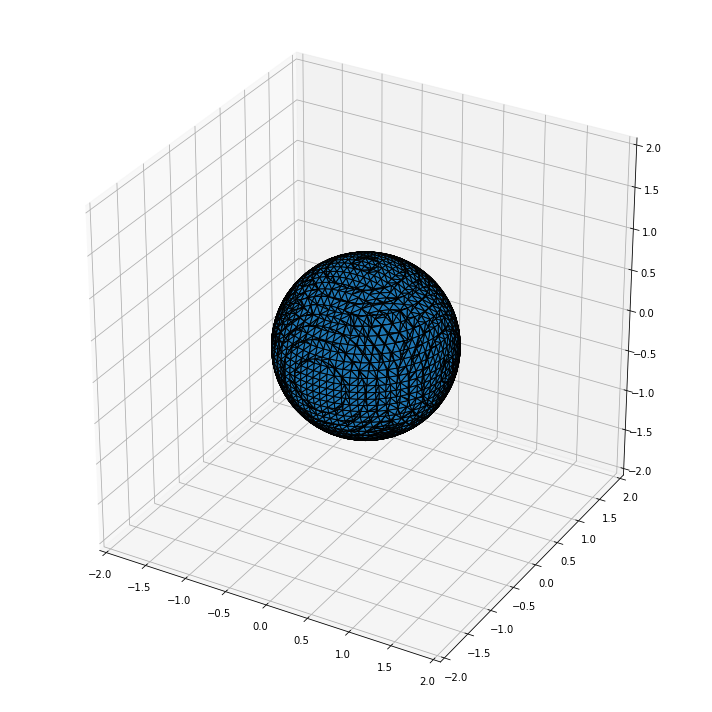

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlim(-2, 2)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(-2, 2)  # b = 10
ax.set_zlim(-2, 2)  # c = 16

plt.tight_layout()
plt.show()

Reminder: This is a very simple case guiding to the beauty of implicit function. For the real senerios, the function to describe an object can be quite complex, which we may not able to give a suitable parmeterizetion. However, we have neural networks, which are known by their capability to represent complex, non-linear functions. We able to leverage neural networks to represent geometry and this is the hot topic called neural rendering.